<a href="https://colab.research.google.com/github/bryanzheng2222/RandomForest/blob/main/TC_Demo_Machine_Learning_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Talent_Cluster'

In [ ]:
import os

In [ ]:
import pandas as pd

In [ ]:
df_cam = pd.read_csv (os.path.join (base_dir, 'Cam.csv'),index_col = 0)

In [ ]:
df_cam.head(5)

,Campaign,Ad group,Ad group bid strategy type,Ad relevance,Device,Currency code,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
Day,,,,,,,,,,,,,,
27/2/2022,TC Job Classifications,ICT,Maximise clicks,Below average,Tablets,NZD,0,0,0,--,0.0,0.0,--,0
5/10/2021,TC Job Classifications,Accounting,Maximise clicks,Above average,Computers,NZD,0,38,0.00%,--,0.0,0.0,--,0
24/10/2021,TC Job Classifications,Accounting,Maximise clicks,Above average,Computers,NZD,0,0,0,--,0.0,0.0,--,0
29/9/2021,TC Job Classifications,IT,Maximise clicks,Above average,Computers,NZD,0,65,0.00%,--,0.0,0.0,--,0
17/10/2021,TC Job Classifications,IT,Maximise clicks,--,Computers,NZD,0,0,0,--,0.0,0.0,--,0


In [ ]:
df_cam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5148 entries, 27/2/2022 to 30/11/2021
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Campaign                    5148 non-null   object 
 1   Ad group                    5148 non-null   object 
 2   Ad group bid strategy type  5148 non-null   object 
 3   Ad relevance                5148 non-null   object 
 4   Device                      5148 non-null   object 
 5   Currency code               5148 non-null   object 
 6   Clicks                      5148 non-null   int64  
 7   Impr.                       5148 non-null   object 
 8   CTR                         5148 non-null   object 
 9   Avg. CPC                    5148 non-null   object 
 10  Cost                        5148 non-null   float64
 11  Conversions                 5148 non-null   float64
 12  Cost / conv.                5148 non-null   object 
 13  Conv. rate              

In [ ]:
df_cam.isnull()

,Campaign,Ad group,Ad group bid strategy type,Ad relevance,Device,Currency code,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
Day,,,,,,,,,,,,,,
27/2/2022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5/10/2021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24/10/2021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29/9/2021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17/10/2021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23/11/2021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7/12/2021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25/10/2021,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_cam.isnull().sum()

Campaign                      0
Ad group                      0
Ad group bid strategy type    0
Ad relevance                  0
Device                        0
Currency code                 0
Clicks                        0
Impr.                         0
CTR                           0
Avg. CPC                      0
Cost                          0
Conversions                   0
Cost / conv.                  0
Conv. rate                    0
dtype: int64

In [ ]:
df_cam = df_cam.rename (columns = {
    'Campaign': 'Cam',
    'Ad group': 'Ad_group',
    'Ad group bid strategy type' : 'Bid_type',
    'Ad relevance' : 'Relevance',
    'Device' : 'Device',
    'Clicks' : 'Clicks',
    'Impr.' : 'Impressions'
})

In [ ]:
df_cam

,Cam,Ad_group,Bid_type,Relevance,Device,Currency code,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
Day,,,,,,,,,,,,,,
27/2/2022,TC Job Classifications,ICT,Maximise clicks,Below average,Tablets,NZD,0,0,0,--,0.0,0.0,--,0
5/10/2021,TC Job Classifications,Accounting,Maximise clicks,Above average,Computers,NZD,0,38,0.00%,--,0.0,0.0,--,0
24/10/2021,TC Job Classifications,Accounting,Maximise clicks,Above average,Computers,NZD,0,0,0,--,0.0,0.0,--,0
29/9/2021,TC Job Classifications,IT,Maximise clicks,Above average,Computers,NZD,0,65,0.00%,--,0.0,0.0,--,0
17/10/2021,TC Job Classifications,IT,Maximise clicks,--,Computers,NZD,0,0,0,--,0.0,0.0,--,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23/11/2021,TC Job Classifications,IT,Maximise clicks,Below average,Mobile phones,NZD,0,0,0,--,0.0,0.0,--,0
7/12/2021,TC Job Classifications,IT,Maximise clicks,Average,Computers,NZD,0,2,0.00%,--,0.0,0.0,--,0
25/10/2021,TC Job Classifications,Accounting,Maximise clicks,Below average,Tablets,NZD,0,3,0.00%,--,0.0,0.0,--,0


In [ ]:
df_cam.sort_values (by = ['Conversions'],ascending = False)

,Cam,Ad_group,Bid_type,Relevance,Device,Currency code,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
Day,,,,,,,,,,,,,,
10/12/2021,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,Above average,Mobile phones,NZD,90,913,9.86%,0.18,16.37,6.0,2.73,6.67%
4/1/2022,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,Above average,Mobile phones,NZD,36,416,8.65%,0.12,4.25,5.0,0.85,13.89%
4/1/2022,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,--,Mobile phones,NZD,69,844,8.18%,0.12,8.12,4.5,1.8,6.52%
15/12/2021,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,Above average,Mobile phones,NZD,68,916,7.42%,0.18,12.48,4.0,3.12,5.88%
17/1/2022,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,Above average,Mobile phones,NZD,54,773,6.99%,0.13,6.92,4.0,1.73,7.41%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/9/2021,TC Job Classifications,Accounting,Maximise clicks,Above average,Mobile phones,NZD,1,10,10.00%,1.43,1.43,0.0,--,0.00%
19/11/2021,TC Job Classifications,Accounting,Maximise clicks,Above average,Tablets,NZD,0,1,0.00%,--,0.00,0.0,--,0
17/10/2021,TC Job Classifications,IT,Maximise clicks,Above average,Mobile phones,NZD,0,0,0,--,0.00,0.0,--,0


In [ ]:
df_cam.isnull().sum()

Cam              0
Ad_group         0
Bid_type         0
Relevance        0
Device           0
Currency code    0
Clicks           0
Impressions      0
CTR              0
Avg. CPC         0
Cost             0
Conversions      0
Cost / conv.     0
Conv. rate       0
dtype: int64

In [ ]:
number_columns = ['Cam', 'Ad_group', 'Bid_type','Relevance','Device']
for column in number_columns:
  df_cam[column] = pd.Categorical(df_cam[column])
print(df_cam.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5148 entries, 27/2/2022 to 30/11/2021
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Cam            5148 non-null   category
 1   Ad_group       5148 non-null   category
 2   Bid_type       5148 non-null   category
 3   Relevance      5148 non-null   category
 4   Device         5148 non-null   category
 5   Currency code  5148 non-null   object  
 6   Clicks         5148 non-null   int64   
 7   Impressions    5148 non-null   object  
 8   CTR            5148 non-null   object  
 9   Avg. CPC       5148 non-null   object  
 10  Cost           5148 non-null   float64 
 11  Conversions    5148 non-null   float64 
 12  Cost / conv.   5148 non-null   object  
 13  Conv. rate     5148 non-null   object  
dtypes: category(5), float64(2), int64(1), object(6)
memory usage: 428.6+ KB
None


In [ ]:
print (df_cam['Bid_type'].value_counts())
print (df_cam['Cam'].value_counts())
print (df_cam['Relevance'].value_counts())

Maximise clicks         4571
Maximise conversions     577
Name: Bid_type, dtype: int64
TC Job Classifications                 3794
TC Clicks Job Seekers                   750
TC Conversion Job Seeker Search Ads     360
TC Conversion Companies Search Ads      217
TC Clicks Companies                      27
Name: Cam, dtype: int64
 --              2350
Above average    1738
Below average     743
Average           317
Name: Relevance, dtype: int64


In [ ]:
df_cam['Converion_Performance'] = df_cam['Conversions'].map(lambda x: 1 if x>3 else -1)

In [ ]:
df_cam.sort_values (by = ['Conversions'],ascending = False)

,Cam,Ad_group,Bid_type,Relevance,Device,Currency code,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate,Converion_Performance
Day,,,,,,,,,,,,,,,
10/12/2021,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,Above average,Mobile phones,NZD,90,913,9.86%,0.18,16.37,6.0,2.73,6.67%,1
4/1/2022,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,Above average,Mobile phones,NZD,36,416,8.65%,0.12,4.25,5.0,0.85,13.89%,1
4/1/2022,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,--,Mobile phones,NZD,69,844,8.18%,0.12,8.12,4.5,1.8,6.52%,1
15/12/2021,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,Above average,Mobile phones,NZD,68,916,7.42%,0.18,12.48,4.0,3.12,5.88%,1
17/1/2022,TC Clicks Job Seekers,Job Seeker Click,Maximise clicks,Above average,Mobile phones,NZD,54,773,6.99%,0.13,6.92,4.0,1.73,7.41%,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/9/2021,TC Job Classifications,Accounting,Maximise clicks,Above average,Mobile phones,NZD,1,10,10.00%,1.43,1.43,0.0,--,0.00%,-1
19/11/2021,TC Job Classifications,Accounting,Maximise clicks,Above average,Tablets,NZD,0,1,0.00%,--,0.00,0.0,--,0,-1
17/10/2021,TC Job Classifications,IT,Maximise clicks,Above average,Mobile phones,NZD,0,0,0,--,0.00,0.0,--,0,-1


In [ ]:
front = df_cam['Converion_Performance']
df_cam.drop(labels =['Converion_Performance'],axis = 1, inplace = True)
df_cam.insert(0,'Converion_Performance',front)
df_cam.head()

,Converion_Performance,Cam,Ad_group,Bid_type,Relevance,Device,Currency code,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
Day,,,,,,,,,,,,,,,
27/2/2022,-1,TC Job Classifications,ICT,Maximise clicks,Below average,Tablets,NZD,0,0,0,--,0.0,0.0,--,0
5/10/2021,-1,TC Job Classifications,Accounting,Maximise clicks,Above average,Computers,NZD,0,38,0.00%,--,0.0,0.0,--,0
24/10/2021,-1,TC Job Classifications,Accounting,Maximise clicks,Above average,Computers,NZD,0,0,0,--,0.0,0.0,--,0
29/9/2021,-1,TC Job Classifications,IT,Maximise clicks,Above average,Computers,NZD,0,65,0.00%,--,0.0,0.0,--,0
17/10/2021,-1,TC Job Classifications,IT,Maximise clicks,--,Computers,NZD,0,0,0,--,0.0,0.0,--,0


In [ ]:
corr = df_cam.corr()
print (corr)

                       Converion_Performance    Clicks      Cost  Conversions
Converion_Performance               1.000000  0.352336  0.235232     0.452559
Clicks                              0.352336  1.000000  0.781171     0.618219
Cost                                0.235232  0.781171  1.000000     0.536667
Conversions                         0.452559  0.618219  0.536667     1.000000


In [ ]:
Conversion_Performance_Summary = df_cam.groupby ('Converion_Performance')
Conversion_Performance_Summary.mean()

,Clicks,Cost,Conversions
Converion_Performance,,,
-1,1.793466,0.640237,0.068421
1,73.500000,11.726667,4.583333


In [ ]:
import seaborn as sns

,Converion_Performance,Clicks,Cost,Conversions
Converion_Performance,1.000000,0.352336,0.235232,0.452559
Clicks,0.352336,1.000000,0.781171,0.618219
Cost,0.235232,0.781171,1.000000,0.536667
Conversions,0.452559,0.618219,0.536667,1.000000


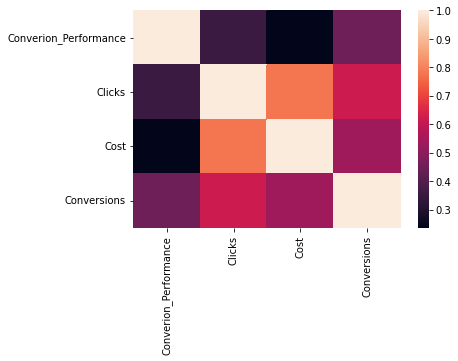

In [ ]:
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
corr

In [ ]:
ad_low_per_cost = df_cam['Cost'][df_cam['Converion_Performance'] == -1].mean()
ad_high_per_cost = df_cam['Cost'][df_cam['Converion_Performance'] == 1].mean()
print ('Cost of Low Converion_Performance: ' + str(ad_low_per_cost))
print ('Cost of High Converion_Performance: ' + str(ad_high_per_cost))

Cost of Low Converion_Performance: 0.6402372617658506
Cost of High Converion_Performance: 11.726666666666668


In [ ]:
#t_test, hypothsis analysis null h0 = click can significantly affect teh conversion performance

In [ ]:
import scipy.stats as stats
stats.ttest_1samp (a = df_cam[df_cam['Converion_Performance'] == 1]['Clicks'],
                   popmean = ad_high_per_cost)

Ttest_1sampResult(statistic=4.956692829482647, pvalue=0.004260286109308117)

In [ ]:
import scipy.stats as stats
stats.ttest_1samp (a = df_cam[df_cam['Converion_Performance'] == 1]['Cost'],
                   popmean = ad_high_per_cost)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [ ]:
degree_freedom = len (df_cam[df_cam['Converion_Performance'] == 1])
LQ = stats.t.ppf (0.025, degree_freedom)
RQ = stats.t.ppf (0.975, degree_freedom)

print ('The t_dist left: ' + str(LQ))
print ('The t_dist right' + str(RQ))

The t_dist left: -2.446911848791681
The t_dist right2.4469118487916806


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#from seaborn.distributions import kdeplot
#fig = plt.figure(figsize = (15,4))
#ax = sns.kdeplot(df_cam.loc[(df_cam['Converion_Performance'] == -1),'Clicks'], color = 'b', shade = True, label = 'ad_low_per_cost')
#ax = sns.kdeplot(df_cam.loc[(df_cam['Converion_Performance'] == 1), 'Clicks'],color = 'r', shade = True, label = 'ad_high_per_cost')
#ax.set(xlabel = 'Clicks', ylabel = 'Frequency')
#plt.title ('Clicks Distribution - HighPerformance VS LowPerformance')

In [ ]:
df_cam['Relevance'] = df_cam['Relevance'].astype ('category').cat.codes
df_cam['Cam'] = df_cam['Cam'].astype ('category').cat.codes
df_cam['Ad_group'] = df_cam['Ad_group'].astype ('category').cat.codes
df_cam['Bid_type'] = df_cam['Bid_type'].astype ('category').cat.codes
df_cam['Device'] = df_cam['Device'].astype ('category').cat.codes

In [ ]:
df_cam.head()

,Converion_Performance,Cam,Ad_group,Bid_type,Relevance,Device,Currency code,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
Day,,,,,,,,,,,,,,,
27/2/2022,-1,4,8,0,3,2,NZD,0,0,0,--,0.0,0.0,--,0
5/10/2021,-1,4,0,0,1,0,NZD,0,38,0.00%,--,0.0,0.0,--,0
24/10/2021,-1,4,0,0,1,0,NZD,0,0,0,--,0.0,0.0,--,0
29/9/2021,-1,4,9,0,1,0,NZD,0,65,0.00%,--,0.0,0.0,--,0
17/10/2021,-1,4,9,0,0,0,NZD,0,0,0,--,0.0,0.0,--,0


In [ ]:
df_cam.drop(columns = ['Currency code','Impressions','CTR','Avg. CPC','Cost / conv.','Conv. rate'], inplace = True)


In [ ]:
df_cam.sort_values (by = ['Conversions'],ascending = False)

,Converion_Performance,Cam,Ad_group,Bid_type,Relevance,Device,Clicks,Cost,Conversions
Day,,,,,,,,,
10/12/2021,1,1,10,0,1,1,90,16.37,6.0
4/1/2022,1,1,10,0,1,1,36,4.25,5.0
4/1/2022,1,1,10,0,0,1,69,8.12,4.5
15/12/2021,1,1,10,0,1,1,68,12.48,4.0
17/1/2022,1,1,10,0,1,1,54,6.92,4.0
...,...,...,...,...,...,...,...,...,...
28/9/2021,-1,4,0,0,1,1,1,1.43,0.0
19/11/2021,-1,4,0,0,1,2,0,0.00,0.0
17/10/2021,-1,4,9,0,1,1,0,0.00,0.0


In [ ]:
df_cam.sort_values (by = ['Conversions'],ascending = False)

,Converion_Performance,Cam,Ad_group,Bid_type,Relevance,Device,Clicks,Cost,Conversions
Day,,,,,,,,,
10/12/2021,1,1,10,0,1,1,90,16.37,6.0
4/1/2022,1,1,10,0,1,1,36,4.25,5.0
4/1/2022,1,1,10,0,0,1,69,8.12,4.5
15/12/2021,1,1,10,0,1,1,68,12.48,4.0
17/1/2022,1,1,10,0,1,1,54,6.92,4.0
...,...,...,...,...,...,...,...,...,...
28/9/2021,-1,4,0,0,1,1,1,1.43,0.0
19/11/2021,-1,4,0,0,1,2,0,0.00,0.0
17/10/2021,-1,4,9,0,1,1,0,0.00,0.0


In [ ]:
#from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [ ]:
target_name = 'Ad_group'
X = df_cam.drop ('Ad_group', axis = 1)
y = df_cam[target_name]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123)

In [ ]:
dtree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 3,
    min_weight_fraction_leaf = 0.01) # Aviod overfitting 

dtree = dtree.fit(X_train, y_train)
print ('\n\n ----- Decision Tree----')
print (classification_report (y_test, dtree.predict(X_test)))

rf = RandomForestClassifier (
    criterion = 'entropy',
    n_estimators = 1000,
    max_depth = None,
    min_samples_split=0.02
    )

rf.fit(X_train, y_train)
print('\n\n ----- RandomForest----')
print (classification_report (y_test, rf.predict(X_test)))





 ----- Decision Tree----
              precision    recall  f1-score   support

           0       0.24      0.86      0.37       150
           1       0.00      0.00      0.00         2
           2       0.37      1.00      0.54        20
           3       0.00      0.00      0.00        77
           4       0.00      0.00      0.00        74
           5       0.00      0.00      0.00         5
           6       0.57      1.00      0.73        16
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        32
           9       0.89      0.22      0.35       109
          10       0.98      1.00      0.99       119
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.00        76

    accuracy                           0.40       773
   macro avg       0.20      0.27      0.20       773

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ----- RandomForest----
              precision    recall  f1-score   support

           0       0.29      0.67      0.40       150
           1       1.00      0.50      0.67         2
           2       0.57      0.40      0.47        20
           3       0.31      0.61      0.41        77
           4       1.00      0.01      0.03        74
           5       0.00      0.00      0.00         5
           6       1.00      0.19      0.32        16
           7       0.28      1.00      0.44         7
           8       0.00      0.00      0.00        32
           9       0.45      0.25      0.32       109
          10       0.99      1.00      1.00       119
          11       0.24      0.62      0.35        13
          12       0.00      0.00      0.00         6
          13       0.33      0.01      0.03        67
          14       0.15      0.03      0.04        76

    accuracy                           0.42       773
   macro avg       0.44      0.35      0.30       773


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
feature_cols = ['Cam','Ad_group','Bid_type','Relevance','Device','Clicks','Cost','Conversions']

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#dot_data = StringIO()
#export_graphviz(clf, out_file = dot_data,
 #               filled = True, rounded = True,
  #              special_characters=True, feature_names=feature_cols, class_names =['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue)
#graph.write_png ('campaign.png')
#Image(graph.create_png())

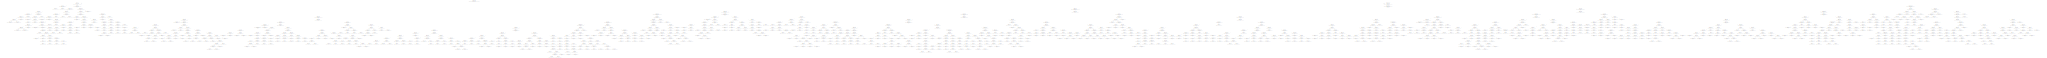

In [ ]:
from IPython.display import SVG
from graphviz import Source
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))

In [ ]:
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.272208 to fit


'dtree_render.png'